**Machine Learning I (Semester 1 2024)**
# Tutorial Session 1: Statistical Inference

*N. Hernitschek*



This Jupyter notebook gives an introduction to probability and statistics with a focus on describing and fitting data similar to those from astronomical surveys.

It is based on code from the textbook

Statistics, Data Mining and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of
Survey Data - Z. Ivezic, A. J. Connolly, J. T. VanderPlas, A. Gray.

***Exercises required for class participation are in <font color='red'>red</font>.***

---
## Contents

* [Getting started with Python](#first-bullet)
* [Good Coding Style](#second-bullet)
* [Descriptive Statistics](#third-bullet)
* [Physical Models](#fourth-bullet)
* [Summary](#nineth-bullet)


## 1. Getting started with Python <a class="anchor" id="first-bullet"></a>

We summarize here a few basics to get started with Python.
This will not be a Python course, but rather will require some Python preknowledge. If you need a more detailed Python refresher, please look up the online resources.

### Python installation

Everyone will need to have the proper software environment in order to be able to participate in the course.  

If you don't have Python 3.x (e.g. Python 3.7., 3.8 or 3.9) already installed, please follow the steps below.
If you already have a Python 3.x installation, make sure you have the packages numpy, scipy, matplotlib, scikit-learn installed; otherwise, install them using `pip`.
<font color='red'>The goal of this is having a working Python3 environment with the aforementioned packages.</font>

### Miniconda

1. Install Miniconda (skip step 1 if you already have an Anaconda Python3 installation)

	* Either...download and install the relevant Miniconda file from here: https://docs.conda.io/en/latest/miniconda.html
	* OR... use Terminal command line installation
		* Download the right one for your architecture
			* Mac: `wget -q https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-x86_64.sh`
			* Linux: `wget -q https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh`
			* Windows (untested): `wget -q https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe`

		* `bash Miniconda3-latest-Linux-x86_64.sh -b`
		* `rm Miniconda3-latest-Linux-x86_64.sh` (careful with “rm”)
        
        
2. Open a **new** terminal window, and make sure your `$PATH` variable points to the Anaconda installation. You can do this by typing

    `[~]$ which python`
    
    The result should show the path to the newly-installed Anaconda folder, e.g. `/usr/bin/python`
    
    
3. If you have problems with step 2, then you may not have added Anaconda to you Python path during installation. How to do this depends on whether you use BASH or TCSH (if you don't know what that means, you are probably using BASH).

    I use BASH, so have the following line added to my `.bash_profile` file
    
    `
    export PATH="$HOME/opt/miniconda3/bin:$PATH"
    `

    If you use TCSH instead, you will need the following in your `.tcshrc` file:                                                                                                                                
    `
    set path=(/Users/gtr/opt/anaconda3/bin $path)
    `

    Now repeat step 2.

### Python environment for class

If using Anaconda, I recomment using a Python environment.

1. Create a new Python environment for this class: `conda create -n machinelearning_class python=3.8 numpy scipy matplotlib scikit-learn nb_conda`. Press `y` to proceed when asked.


2. This will create a conda environment that can be activated by `conda activate machinelearning_class`


3. Open a `jupyter notebook`


4. Set the Kernel

   * when opening a new notebook: click `New` and select `Python [conda env:machinelearning_class]`  
   * when opening an existing notebook (like this tutorial): click `Kernel` --> `Change Kernel` --> `Python [conda env:machinelearning_class]`
   
   
5. When necessary, you can deactivate this Python environment with `conda deactivate`   
  

My package versions are as follows. If you run into problems that I am not having, resolving package version differences would be a good place to start debugging.

You can check your package versions with:

In [1]:
from platform import python_version
import numpy
import scipy
import matplotlib
import sklearn

print("python version ",python_version(), " core programming language")
print("numpy version ",numpy.__version__, " efficient array operations")
print("scipy version ",scipy.__version__, " scientific computing tools")
print("matplotlib version ",matplotlib.__version__, " plotting and visualization")
print("sklearn version ",sklearn.__version__, " machine learning")

python version  3.10.12  core programming language
numpy version  1.24.4  efficient array operations
scipy version  1.10.1  scientific computing tools
matplotlib version  3.7.1  plotting and visualization
sklearn version  1.2.2  machine learning



### Getting Started with Python

If you don't know *any* Python experience at all, this class may be pretty tough going.  However, many of you might need a refresher.  A good place to start is **Appendix A** in the textbook.  

These tutorials from Jake VanderPlas (a contributor to astroML and a co-author of our textbook) are also very helpful:

- [A Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)

In addition, these general tutorials can be recommended:
https://docs.python.org/3/tutorial/
https://swcarpentry.github.io/python-novice-inflammation/


Python is heavily documented online. Usually, if you need a command that performs a specific task, you’ll find something on the web. 


---

### Interfacing with Python

You can run Python code by 1) starting Python on the command line (**remember to activate the class python environment first!**): 

    $ python
    
or 2) using a web-based interactive interface [Jupyter](http://jupyter.org/).

We'll be using the latter.  In fact, each homework assignment, as well as code for the lectures, will be in the form of a [jupyter notebook](http://jupyter.org/) that you'll sync to your fork from the upstream github repository before the start of each class.  

To start the notebook app, run on the command line:

    $ jupyter notebook &
    
This will pop up a web page in your default browser and show the Dashboard where you can navigate to a particular notebook or open a new one.  You can also open a notebook directly with 

    $ jupyter notebook Lecture_X.ipynb &
   
If you are creating a new notebook, click on `New` at the top-right of the page and select `Python [conda env:astr8070]`. When opening an existing notebook, click `Kernel` --> `Change Kernel` --> `Python [conda env:astr8070]`

---
In case Jupyter notebooks cannot be executed, you have to install the packages first:
    
    $ pip3 install jupyter
 
    $ python3 -m ipykernel install --user

   
   

### Working with jupyter notebooks

Notebooks have two primary cell types: 'Markdown' and 'Code'. The Markdown cells just contain text (like this cell).  The Code cells are meant to be altered and executed.  

To execute a cell in the notebook, type '**shift-return**'. If you see a `*` in the bracket left of the cell or a `Busy` in the tab title, it means the command is in the process of running, and you need to wait for it to finish. This happens frequently for code cells.

The notebook is autosaved, so that when you return to a notebook, everything is the same as you left it. If you want to reset it, you can do “revert to checkpoint”.  If you save it yourself, you will create a checkpoint, and the original version will be unavailable.

--- 

Here are some useful commands to get you started (# followed by text indicates a comment and not what you type)!

    In [ ]: ?          # basic help function.  Pops open a sub-frame at the bottom of page.  
                         Close with "x".
    
    In [ ]: %quickref  # Pops open a quick reference card
    
    In [ ]: ! 	       # spawning out to the operating system; 
                         e.g files=!ls will fill the variable files 
                         with a list of files in your directory.

--- 

Jupyter also contains a number of [“magic” commands](https://ipython.org/ipython-doc/dev/interactive/magics.html).
Two examples are

    In [ ]: %matplotlib inline  # makes plots within the web browser instead of popping up a new window
    
    In [ ]: %whos               # lists the vectors, etc. that you have defined.
    
    In [ ]: %timeit func.       # times a function `func` that you have defined

Jupyter also has lots of [keyboard shortcuts](https://ipython.org/ipython-doc/1/interactive/notebook.html#keyboard-shortcuts) – the main one is shift-enter to run a cell.

### (Brief) Review of Python Basics <a class="anchor" id="fourth-bullet"></a>

To start with Python uses the following [numerical data types and operations](https://docs.python.org/2/library/stdtypes.html#boolean-operations-and-or-not)

We will encounter three main types of collections of data:

    Lists: a mutable array of data
    Tuples: ordered, immutable list
    Dictionaries: keyword/value lookup

It is worth noting that python begins indexing at 0 and uses [row-major order](https://en.wikipedia.org/wiki/Row-major_order), which means that pairs of values are written as (y,x) instead of (x,y).  This actually makes sense when one is dealing with tables of data.


Tuple

    its most notable property is that it is immutable – after being defined, it cannot be changed
    denoted by parentheses, e.g., x=(5.0,7.0,9.0,11.0)
    to index, use square brackets, e.g., print(x[0])
    can get part of one using :, e.g., try print(x[2:]) etc.

List

    in contrast to a tuple, it can be reassigned
    denoted with brackets, e.g,. y=[5.0,7.0,9.0,11.0]
    to index, also use square brackets, e.g., print(x[0])
    can get part of one using :, e.g., try print(y[2:]) etc.

Dictionary

    assigns a value to a key, for example z={'a':2,'b':4,'c':6}, where a,b,c are the keywords.
    the dictionary is indexed by the keyword, e.g., print(z['a'])
    they can be quite complicated.
    
Here is a lot more on data structures: [https://docs.python.org/2/tutorial/datastructures.html](https://docs.python.org/2/tutorial/datastructures.html).

---
### Methods and Attributes

Each type of data structure has associated “methods”. A method is like a little built-in function that can be run on a data structure.

For example, open a new cell (or in a python terminal window) and do the following:

```python
v=[27.0,35.0,101.0,57.0]
print(v)
v.sort()
print(v)
```

So v has now been replaced with the sorted v.

The parentheses indicate that this is a "method", which is something that can (but doesn't have to) take *arguments*.  An "attribute" on the other hand is just a property.  E.g., if you have an object called `shape` and shape contains information like `area`, `length`, `width`, etc., then you access those values as

```python
print(shape.area)
```

Basic mathematical operations that can be applied to your data are found here: [https://docs.python.org/2/library/math.html](https://docs.python.org/2/library/math.html).


If you haven't used Python before, please check out the links above on short Python tutorials.


---
### NumPy

NumPy is short for Numerical Python. It is the foundational package for scientific computing in Python. It is a library for working with data structures called **arrays** that are more efficient for storing amd manipulating data than other Python data structures (or C++ for that matter). 

For example, cut and paste this into a new cell, then type shift-enter to run it:

```python
import numpy as np
xlist = [1,2,3]
xarray = np.array(xlist)
twice_xarray = 2*xarray
print(twice_xarray)
```

This is far better than creating a for loop over the entries in `xlist` or even something fancier like a "list comprehension"
```python
   twice_xlist = [2*x for x in xlist]
   print(twice_xlist)
```
Note the lack of commas in the array as compared to the list.

To load the Numpy library type:  

    In [ ]: import numpy as np
    
In fact, just plan on starting **every** notebook with this!    

The basic unit for numpy is an [ndarray](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html).  See the link for examples of how to define, index, slice, etc. the array.

There are quite a few **methods** associated with numpy arrays.  Some useful ones include:

|Method |	Property|
|-------|-----------|
|np.zeros(5,float) |	yields a 5-element array of zeros of type float |
|a=np.empty(4) |	yields a 4-element empty array |
|a.fill(5.5) |	fills that array with 5.5 for all elements |
|np.arange(5) |	yields an integer array of length 5 with increasing values | 
|b=np.random.normal(10,3,5) |	yields a 5 element array of normally distributed numbers with mean 10 and variance 3 |
|mask=b > 9 |	creates a boolean array determing which numbers are greater than 9 |
|print(b[mask]) |	prints the ones with values > 9 |
|b[mask]=0 | sets the ones > 9 to zero |

Arrays can be multidimensional, e.g., ```c=np.random.normal(10,3,(2,4))```, creates a 2 x 4 array with normally distributed numbers with mean 10 and variance 3.

More methods for multidimensional arrays:

|Method |	Property|
|-------|-----------|
|d=c[0,:] |	grabs the first (0th) row of c. |
|d=c[1,:] |	grabs the second (1st) row of c. |
|d=c[:,0] |	grabs the first column of c. |
|c.dtype |	data type |
|c.size |	total number of elements |
|c.ndim |	number of dimensions |
|c.shape |	shape or dimensionality |
|c.nbytes |	memory used (bytes) |
|c.min() |	gives the minimum of c |
|c.max() |	gives the maximum of c |
|c.sum() |	sum of all elements |
|c.mean() |	mean of all elements |
|c.std() |	standard deviation of all elements |
|c.sum(axis=0) | will present sum along the 0th axis (column direction). The result will have reduced dimensionality |

You can also operate with arrays, for example, adding them together, multiplying them, multiplying or adding a constant. There are, however, "broadcasting" rules so that you need to make sure you know what you are doing when dealing with arrays of different sizes.

---
### SciPy


[SciPy](http://docs.scipy.org/doc/scipy/reference/) is an "open-source software for mathematics, science, and engineering".  We `import` it the same way that we import numpy:


    In [ ]: import scipy as sp


SciPy is a suite of tools for data analysis including integration, statistical functions, interpolation.  It is built on top of Numpy. Where Numpy is intended for array *manipulation*, Scipy is intended for *analysis*. It may be worth looking at the users guide to get an idea of the kinds of functions are available. For example to see what is available in the scipy.integrate package, do the following:

```
import scipy.integrate
scipy.integrate?
```

---
### Pandas

[Pandas](https://pandas.pydata.org/) is an "is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.". 

We `import` it the same way that we import numpy:


    In [ ]: import pandas as pd

Pandas is a library designed with manipulating numerical tables and time series in mind and is a very useful tool for data science.   We will be making frequent use of Pandas [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) in the course of this class. You can get some experience using Pandas either with [DataCamp](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python) or with [Chapter 3 of the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html).

```
import pandas as pd
pd?
```

---
### Scikit-learn

The [Scikit-learn library](http://scikit-learn.org/) contains algorithms for machine learning. It forms the core of computing tools that we will use for this class. We will take a look at `scikit-learn`later on. You might want to spend some time going through their quick start guide, user's guide and tutorials here: [http://scikit-learn.org/stable/documentation.html](http://scikit-learn.org/stable/documentation.html).

### <font color='red'>Matplotlib Example</font> <a class="anchor" id="fifth-bullet"></a>

It is generally useful to be able to visualize your data.  We will do that using the 
[matplotlib](http://matplotlib.org/) library. One nice resource for what is possible with `matplotlib`is this [thumbnail gallery](http://matplotlib.org/gallery.html).

Let's make sure that everything is working by making a simple plot:

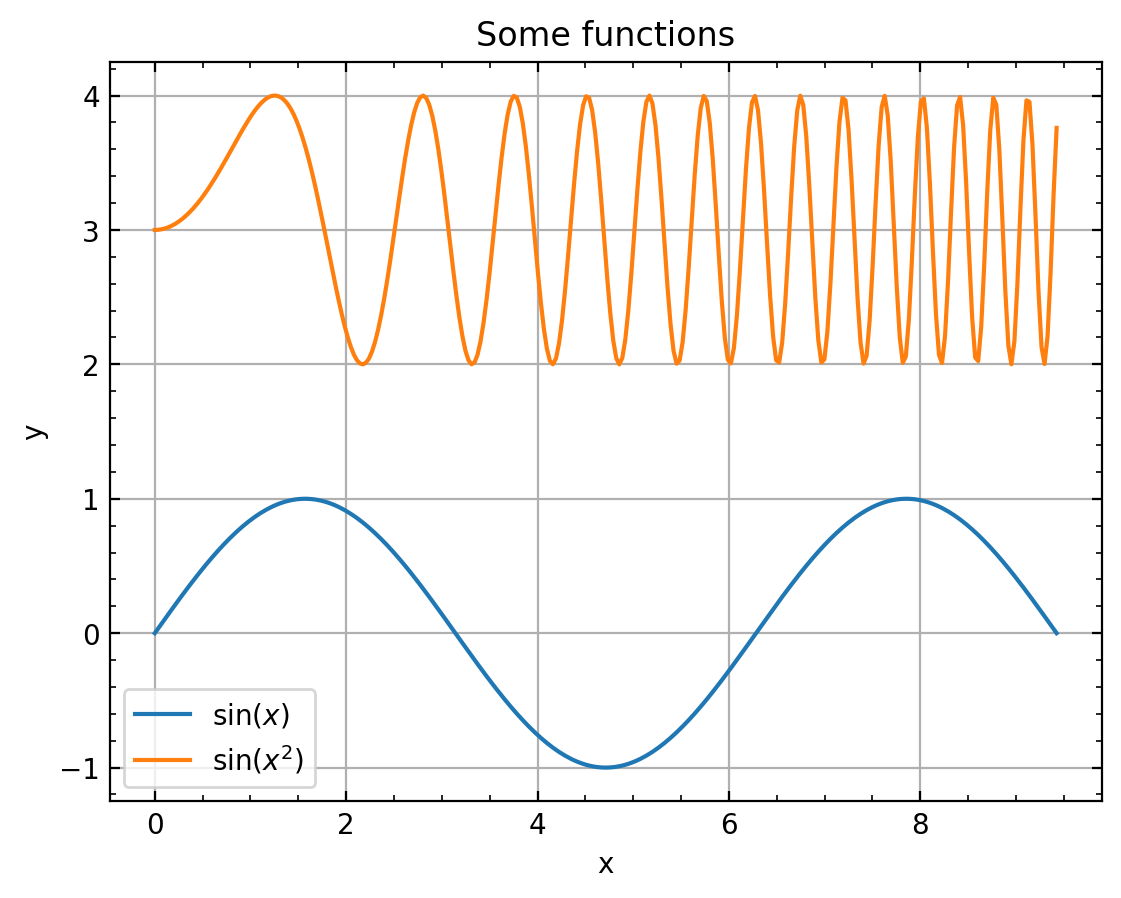

In [3]:
# magic command to make the figure pop up below instead of in a new window
%matplotlib inline
%config InlineBackend.figure_format='retina' # very useful command for high-res images

# invoke pyplot in matplotlib, give it an alias
import matplotlib.pyplot as plt  
import numpy as np

x = np.linspace(0, 3*np.pi, 300)

y = np.sin(x)
y2 = 3.0+np.sin(x**2)

plt.plot(x, y, label=r'$\sin(x)$')
plt.plot(x, y2, label=r'$\sin(x^2)$')
plt.title('Some functions')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(which='major')
plt.legend(loc='lower left');

## optional extras
plt.minorticks_on()
plt.tick_params(which='both', direction='in', tick2On=True)

You can change both the [marker/line styles](http://matplotlib.org/examples/lines_bars_and_markers/) and [colors](http://matplotlib.org/api/colors_api.html). Also worth exploring are the colors in the [palettable library](https://jiffyclub.github.io/palettable/), where you can see the colors displayed at [http://colorbrewer2.org/](http://colorbrewer2.org/). Several color cycles here are color-blind safe. 

<font color='red'>**Change the colors in the plot above to something different, and add a cos(3x) curve.**</font>

## 2. Good Coding Style <a class="anchor" id="second-bullet"></a>

1. Give each piece of code an informative name, and separate the words in the name by
underscores. So, for instance, if you have code to populate the area on a sphere at random,
call that code populate_sphere_at_random.

2. Break up code in smaller meaningful pieces that can easily be reused. Write functions.

3. Comment your code well. When you adopt code from other sources (i.e: the internet), it is
good practice to reference where it came from in comments as well.

4. When commiting changed files, always add a comment like in the example above. 



## 3. Descriptive Statistics <a class="anchor" id="third-bullet"></a>

Our goal is to estimate $h(x)$ given some measured data, allowing us to reconstruct the empirical distribution $f(x)$. An arbitrary distribution can be characterized by **location** parameters (i.e., position), **scale** parameters (i.e., width), and **shape** parameters. These parameters are called ***descriptive statistics***.

The distribution we're trying to characterize could be anything, e.g. (in astronomy) the distribution of distances of stars.

Python offers many built-in functions for descriptive statistics in its `scipy.stats` package.

In [5]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

In [6]:
# Execute this cell
#------------------------------------------------------------
# Let's generate some data: a mix of several Cauchy distributions
random_state = np.random.RandomState(seed=0)
N = 10000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
hx = lambda x: sum([f * scipy.stats.cauchy(mu, gamma).pdf(x)
                    for (mu, gamma, f) in mu_gamma_f])
data = np.concatenate([scipy.stats.cauchy(mu, gamma).rvs(int(f * N), 
                                                         random_state=random_state)
                       for (mu, gamma, f) in mu_gamma_f])
random_state.shuffle(data)
data = data[data > -10]
data = data[data < 30]

Text(0, 0.5, '$f(x)$')

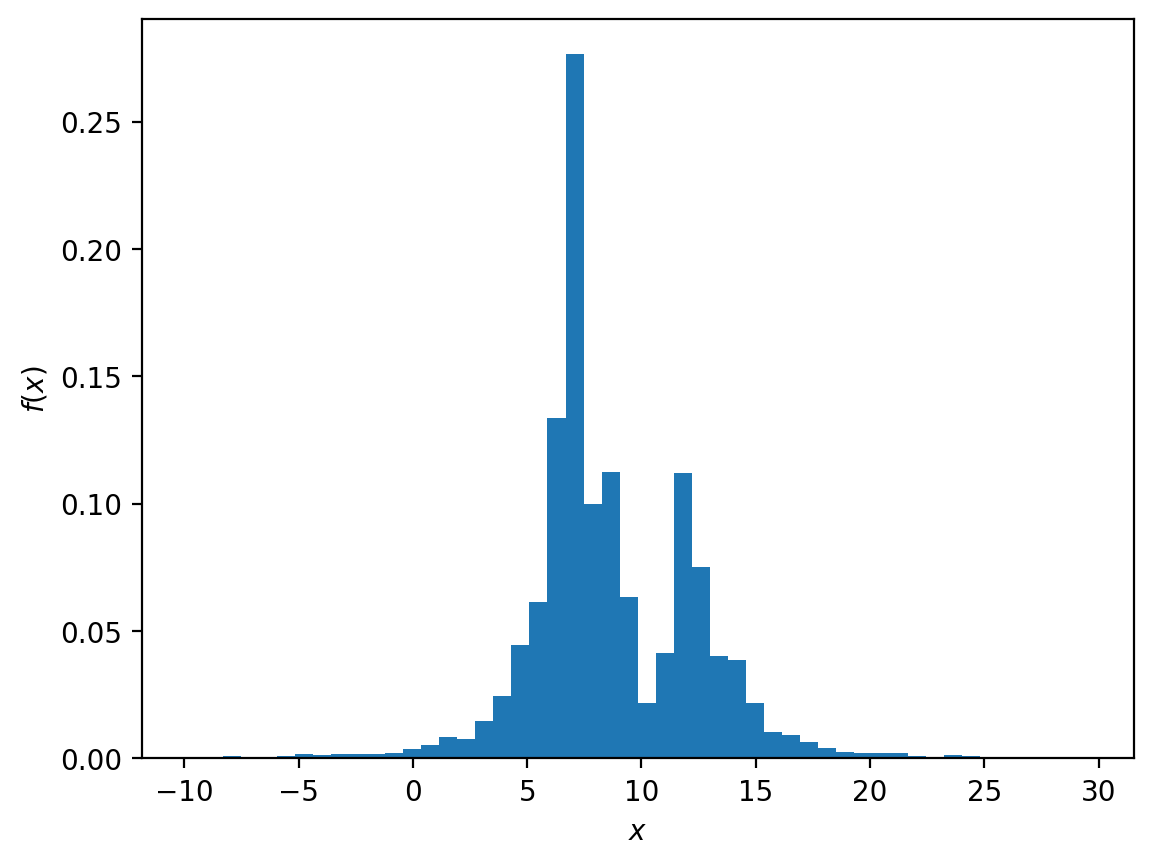

In [7]:
# Execute this cell
# make a histogram to get an idea of what the distribution looks like
plt.hist(data, bins=50, density=True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

In [8]:
# Execute this cell
mean = np.mean(data)
print(mean)

8.707331724932475


The **mean** of a sample is 

$$\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i$$ 

This is actually known as the **sample arithmetic mean**, and derives from *Monte Carlo integration* to get the first moment of the distribution, i.e. 

$$\mu = E(x) = \langle x \rangle = \int_{-\infty}^{\infty} x h(x)\,dx \approx \frac{1}{N}\sum_{i=1}^N x_i $$

where $\{x_i\}$ are random samples from the properly normalzied $h(x)$, and $E(\cdot)$ means the **expectation value**. In general we can use random sampling and Monte Carlo integration to deduce integrals over distributions such that 

$$\int_{-\infty}^{\infty} g(x) h(x)\,dx \approx \frac{1}{N}\sum_{i=1}^N g(x_i)$$

(We will learn later on what e.g. random sampling, Monte Carlo integration mean in detail.)

<font color='red'>Does the mean describe the distribution (in the plot) well?</font>

Despite a mean sounds intuitive, some distributions do not have formally calculable means (as integration gives infinity). In these and other cases, the **median** is a more *robust* estimator of the (true) "mean" location of the distribution. That's because it is less affected by **outliers**.

To understand the previous statement, think about multiplying all numbers above the 50th percentile (i.e. the median) by 100, or even just replacing them with larger numbers. The mean would be strongly affected by these corrupted points, but **cumulative statistics based on the ordering of samples would remain unaffected by the outlier corruption**.

<font color='red'>Execute the next cell. Think about and discuss what it is doing.</font>

In [12]:
mean = np.mean(data)

mask = data > 10
data2 = data.copy()
data2[mask] = 200

newmean = np.mean(data2)

print(mean, newmean)


median = np.median(data)

mask = data > 15
data2 = data.copy()
data2[mask] = 100

newmedian = np.median(data2)
newmean = np.mean(data2)

print('median: ', median, newmedian)
print('mean: ', mean, newmean)

8.707331724932475 66.38094352133285
median:  7.665858989040229 7.665858989040229
mean:  8.707331724932475 12.230618259322716


## 4. Physical Models <a class="anchor" id="fourth-bullet"></a>

In the lecture, we have seen that we can either:
* Describe the data, then the process is non-parametric, i.e. we are just trying to describe the data behavior in a compact practical way.
* Guess a physical model for $h(x)$, then the process is parametric. From a model we can generate new data that mimic measurements. 

<font color='red'>**Execute the following code cell.**</font>
This cell produces a figure similar to the one from the lecture. 
The code will start with a generating distribution $h(x)$, draw a number of random samples as data $\{x_i\}$, and then fit these data with a parametric and non-parametric model $f(x)$.


/home/nhernits/.local/lib/python3.10/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


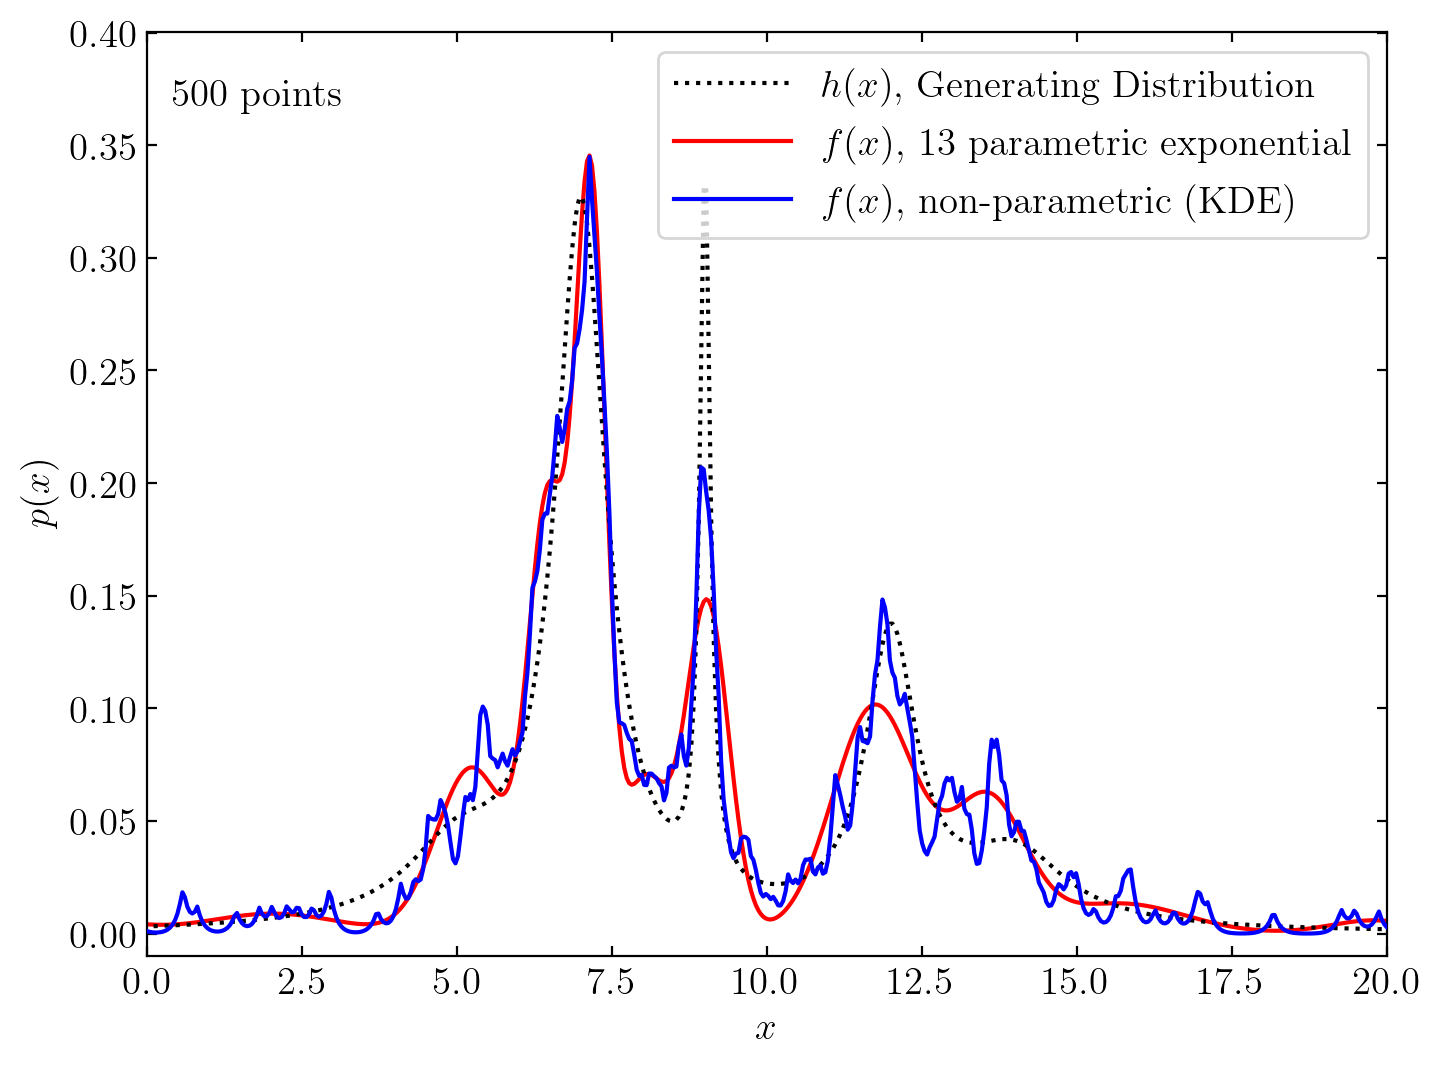

In [13]:
# based on Ivezic v2, Figure 6.8; edited by G. T. Richards and S. R. Taylor

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina' # very useful command for high-res images

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
random_state = np.random.RandomState(seed=0)
N = 500 # number of data points
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
hx = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state)
                    for (mu, gamma, f) in mu_gamma_f])
random_state.shuffle(x)
x = x[x > -10]
x = x[x < 30]

#------------------------------------------------------------
# plot the results
fig,ax = plt.subplots(figsize=(8, 6))

xgrid = np.linspace(-10, 30, 1000)

kernel = 'exponential'
# Compute density with KDE
kde = KernelDensity(bandwidth=0.1, kernel=kernel) # can try different kernels 'gaussian','tophat'
kde.fit(x[:, None])
dens_kde = np.exp(kde.score_samples(xgrid[:, None]))

# Compute density via Gaussian Mixtures using a pre-defined number of clusters (13)
number_clusters = 5 # 5 looks convincing... as the Cauchy mixture was made with 5 Cauchy distributions!

number_clusters = 77 # some unreasonable high number - the algorithm just does what you request!

number_clusters = 13 #had 13 initially for the plot in the lecture slides

gmm = GaussianMixture(n_components=number_clusters).fit(x.reshape(-1, 1))
logprob = gmm.score_samples(xgrid.reshape(-1, 1))
fx = lambda j : np.exp(gmm.score_samples(j.reshape(-1, 1)))

# plot the results
ax.plot(xgrid, hx(xgrid), ':', color='black', zorder=3,
            label="$h(x)$, Generating Distribution")
ax.plot(xgrid, fx(np.array(xgrid)), '-', color='red',
            label="$f(x)$, %i parametric %s "% (number_clusters,kernel))
ax.plot(xgrid, dens_kde, '-', color='blue', zorder=3,
            label="$f(x)$, non-parametric (KDE)")

# label the plot
ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)
ax.set_ylabel('$p(x)$',fontsize=14)
ax.legend(loc='upper right')

ax.set_xlabel('$x$',fontsize=14)
ax.set_xlim(0, 20)
ax.set_ylim(-0.01, 0.4001)

plt.show()

## Summary <a class="anchor" id="nineth-bullet"></a>

At this point, all of you should have:
* a working Python3 installation, e.g. using the Anaconda/Miniconda Python Distribution
* learnt how to use built-in functions for descriptive statistics from Python's `scipy.stats` package
* seen a basic comparison of descriptive statistics vs. model fitting.

